Задача 9

Пекарня пече хліб на продаж магазинам. 
Собівартість однієї булки становить 30 пенсів, її продають за 40 пенсів. 
У таблиці наведено дані про попит за останні 50 днів:
Попит на день, тис. шт.	10	12	14	16	18
Число днів	            5	10	15	15	5

Якщо булка спечена, але не продана, то збитки складуть 20 пенсів за штуку. Визначте, скільки булок потрібно випікати в день.


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


sobivartist_per_bulka = 30  # собівартість однієї булки в пенсах
prodaju_per_bulka = 40      # ціна продажу однієї булки в пенсах
zbitky_per_bulka = 20       # збитки за непродану булку в пенсах
profit_per_bulka = prodaju_per_bulka - sobivartist_per_bulka

popit_per_day = [10, 12, 14, 16, 18]
amount_of_days = [5, 10, 15, 15, 5]

probability_popit = [amount_of_day/sum(amount_of_days) for amount_of_day in amount_of_days]
print(probability_popit)

[0.1, 0.2, 0.3, 0.3, 0.1]


Підсумкова таблиця рішення задачі

In [110]:
def find_tree(probability_popit, result, resultIncomeList):
    for i in range(len(popit_per_day)):
        table = []
        for j in range(len(popit_per_day)):
            sold_per_day = min(popit_per_day[i], popit_per_day[j])
            unsold_per_day = max(0, popit_per_day[i] - popit_per_day[j])
            expected_daily_profit = sold_per_day * profit_per_bulka
            daily_profit = expected_daily_profit - unsold_per_day * zbitky_per_bulka
            unsatisfied_demand = max(0, popit_per_day[j] - popit_per_day[i])
            prob_demand = probability_popit[j]

            table.append([
                prob_demand,
                popit_per_day[i],
                popit_per_day[j],
                sold_per_day,
                unsold_per_day,
                unsatisfied_demand,
                expected_daily_profit,
                daily_profit
            ])

        result.append(table)

        avarage_expected_daily_profit = np.sum([table_row[6] * table_row[0] for table_row in table])
        avarage_daily_profit = np.sum([table_row[7] * table_row[0] for table_row in table])
        resultIncomeList.append([avarage_expected_daily_profit, avarage_daily_profit])
        

In [133]:
# Викликаємо функцію
result = []
resultIncomeList = []

find_tree(probability_popit, result, resultIncomeList)

# Створюємо DataFrame для кожної таблиці
data_frames = []
for i, table in enumerate(result):
    df = pd.DataFrame(table, columns=["Ймовірність", "Спечено", "Попит", "Продано", "Не продано", "Не задоволено", "Очікуваний дохід", "Дохід з витратами"])
    data_frames.append((f"Таблиця {i + 1}: Попит за день - {popit_per_day[i]}", df))


# Виводимо таблиці за допомогою Pandas
for name, df in data_frames:
    print(name)
    print(df)
    print("\n")

for i, income in enumerate(resultIncomeList):
    print("Очікуваний дохід для таблиці", i+1, resultIncomeList[i][0])
    print("Очікуваний дохід з врахуванням витрат для таблиці", i+1, resultIncomeList[i][1])


Таблиця 1: Попит за день - 10
   Ймовірність  Спечено  Попит  Продано  Не продано  Не задоволено  \
0  0.1          10       10     10       0           0               
1  0.2          10       12     10       0           2               
2  0.3          10       14     10       0           4               
3  0.3          10       16     10       0           6               
4  0.1          10       18     10       0           8               

   Очікуваний дохід  Дохід з витратами  
0  100               100                
1  100               100                
2  100               100                
3  100               100                
4  100               100                


Таблиця 2: Попит за день - 12
   Ймовірність  Спечено  Попит  Продано  Не продано  Не задоволено  \
0  0.1          12       10     10       2           0               
1  0.2          12       12     12       0           0               
2  0.3          12       14     12       0           2       

In [112]:
best_result = max(row[0] for row in resultIncomeList)
best_resul_demand = max(row[1] for row in resultIncomeList)

# Вивести максимальне значення
print("Максимальний прибуток, якщо випікатиметься така кількість булок (тис):", best_result/10)
print("Максимальний прибуток з урахуванням втрат, якщо випікатиметься така кількість булок (тис):", best_resul_demand/10)


Максимальний прибуток, якщо випікатиметься така кількість булок (тис): 14.2
Максимальний прибуток з урахуванням втрат, якщо випікатиметься така кількість булок (тис): 11.6


In [122]:
# Змінюємо параметри для аналізу чутливості
sobivartist_per_bulka_values = [25, 30, 35]  # Різні значення собівартості
prodaju_per_bulka_values = [35, 40, 45]      # Різні ціни продажу
zbitky_per_bulka_values = [15, 20, 25]       # Різні збитки за непродану булку

# Функція для аналізу чутливості
def sensitivity_analysis(sobivartist, prodaju, zbitky):
    result = []
    resultIncomeList = []
    popit_per_day = [10, 12, 14, 16, 18]
    find_tree(probability_popit, result, resultIncomeList)

    total_profit = 0
    for table in result:
        for row in table:
            daily_profit = row[7] - row[4] * zbitky
            total_profit += daily_profit * row[0]

    return total_profit

# Виводимо результати аналізу чутливості
for sobivartist in sobivartist_per_bulka_values:
    for prodaju in prodaju_per_bulka_values:
        for zbitky in zbitky_per_bulka_values:
            profit = sensitivity_analysis(sobivartist, prodaju, zbitky)
            print(f"Собівартість: {sobivartist}, Продаж: {prodaju}, Збитки: {zbitky}, Прибуток: {profit:.2f} тис. пенсів")


Собівартість: 25, Продаж: 35, Збитки: 15, Прибуток: 394.00 тис. пенсів
Собівартість: 25, Продаж: 35, Збитки: 20, Прибуток: 360.00 тис. пенсів
Собівартість: 25, Продаж: 35, Збитки: 25, Прибуток: 326.00 тис. пенсів
Собівартість: 25, Продаж: 40, Збитки: 15, Прибуток: 394.00 тис. пенсів
Собівартість: 25, Продаж: 40, Збитки: 20, Прибуток: 360.00 тис. пенсів
Собівартість: 25, Продаж: 40, Збитки: 25, Прибуток: 326.00 тис. пенсів
Собівартість: 25, Продаж: 45, Збитки: 15, Прибуток: 394.00 тис. пенсів
Собівартість: 25, Продаж: 45, Збитки: 20, Прибуток: 360.00 тис. пенсів
Собівартість: 25, Продаж: 45, Збитки: 25, Прибуток: 326.00 тис. пенсів
Собівартість: 30, Продаж: 35, Збитки: 15, Прибуток: 394.00 тис. пенсів
Собівартість: 30, Продаж: 35, Збитки: 20, Прибуток: 360.00 тис. пенсів
Собівартість: 30, Продаж: 35, Збитки: 25, Прибуток: 326.00 тис. пенсів
Собівартість: 30, Продаж: 40, Збитки: 15, Прибуток: 394.00 тис. пенсів
Собівартість: 30, Продаж: 40, Збитки: 20, Прибуток: 360.00 тис. пенсів
Собіва

Собівартість булки: Зміна собівартості впливає на прибуток. Зниження собівартості призводить до збільшення прибутку, тоді як її зростання зменшує прибуток. Вибір оптимальної собівартості важливий для максимізації прибутку.

Ціна продажу булки: Зміна ціни продажу також впливає на прибуток. Підвищення ціни продажу сприяє збільшенню прибутку, а зниження ціни може зменшити прибуток.

Збитки за непродану булку: Збільшення збитків за непродану булку може призвести до зменшення оптимальної кількості булок для випікання, оскільки збільшується втрата від непроданих булок.

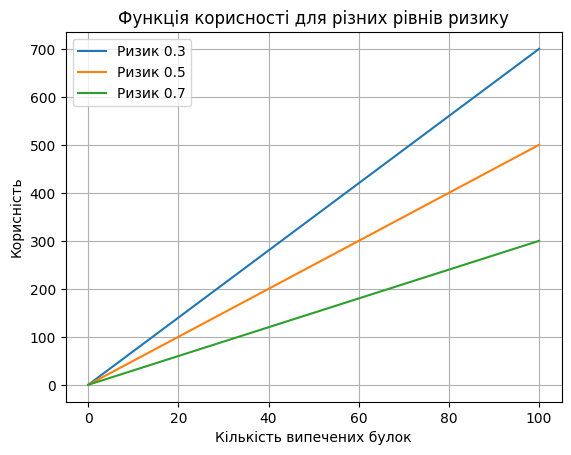

In [135]:
def utility_function(expected_profit, risk_preference):
    # Визначаємо корисність на основі очікуваного прибутку та відношення до ризику
    utility = expected_profit * (1 - risk_preference)
    
    return utility

# Параметри виробництва
sobivartist_per_bulka = 30
prodaju_per_bulka = 40
zbitky_per_bulka = 20
profit_per_bulka = prodaju_per_bulka - sobivartist_per_bulka

# Додаткові параметри
production_capacity = 100  # Максимальна кількість випечених булок (тис)

# Різні рівні ризику
risk_preferences = [0.3, 0.5, 0.7]

# Діапазон кількості випечених булок для аналізу
baked_quantity_range = range(0, 101)

# Зберігаємо корисності для кожного рівня ризику
utility_results = {risk: [] for risk in risk_preferences}

for risk_preference in risk_preferences:
    for baked_quantity in baked_quantity_range:
        # Розрахунок очікуваного прибутку для кожної кількості випечених булок
        expected_profit = min(baked_quantity, production_capacity) * (prodaju_per_bulka - sobivartist_per_bulka)
        
        # Визначення корисності за допомогою функції корисності
        utility = utility_function(expected_profit, risk_preference)
        utility_results[risk_preference].append(utility)

# Побудова графіків корисності для різних рівнів ризику
for risk_preference, utilities in utility_results.items():
    plt.plot(baked_quantity_range, utilities, label=f"Ризик {risk_preference}")

plt.xlabel('Кількість випечених булок (тис)')
plt.ylabel('Корисність')
plt.title('Функція корисності для різних рівнів ризику')
plt.legend()
plt.grid(True)
plt.show()


Отриманий графік відображає залежність корисності від кількості випечених булок для трьох різних рівнів відношення до ризику.

1. Ризик 0.3
: Для низького рівня врахування ризику корисність зростає досить стрімко зі збільшенням кількості випечених булок. Це означає, що особи з низьким рівнем врахування ризику більше схильні до ризику та обирають стратегії з більшою можливістю високого прибутку.

2. Ризик 0.5 (нейтральне ставлення): Помірне врахування ризику призводить до менш стрімкого зростання корисності зі збільшенням виробництва. Ці особи обирають більш збалансовані стратегії, які комбінують можливість високого прибутку з ризиком втрат.

3. Ризик 0.7: Високий рівень врахування ризику призводить до практично лінійного зростання корисності зі збільшенням виробництва. Особи з високим рівнем ризику більше оберігаються і обирають менш ризиковані стратегії.

Вибір оптимальної кількості булок залежатиме від індивідуальних вподобань та ставлення до ризику кожної конкретної особи.